In [1]:
import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Exploration

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('C:/Users/hp/Downloads/day.csv')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Assigning string values to different seasons instead of numeric values
dataset.loc[(dataset['season'] == 1),'season'] = 'Spring'
dataset.loc[(dataset['season'] ==2), 'season'] = 'Summer'
dataset.loc[(dataset['season'] ==3), 'season'] = 'Fall'
dataset.loc[(dataset['season'] ==4), 'season'] = 'Winter'

In [9]:
"""dataset['season'].astype('category').value_counts()"""

"dataset['season'].astype('category').value_counts()"

In [10]:
season_count = dataset['season'].astype('category').value_counts(sort=False)
season_count.name = 'season'
print(season_count)

season
Fall      188
Spring    180
Summer    184
Winter    178
Name: season, dtype: int64


In [11]:
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [12]:
year_count = dataset['yr'].astype('category').value_counts(sort=False)
year_count.name = 'Year'
print(year_count)

yr
0    365
1    365
Name: Year, dtype: int64


In [13]:
def object_map_mnths(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [14]:
dataset[["mnth"]]= dataset[["mnth"]].apply(object_map_mnths)

In [15]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: count, dtype: int64

In [16]:
dataset["holiday"].astype("category").value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [17]:
def str_map_weekday(x):
    return x.map({1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat",7:"Sun"})

In [18]:
dataset[["weekday"]]= dataset[["weekday"]].apply(str_map_weekday)

In [19]:
dataset["weekday"].astype("category").value_counts()

weekday
Mon     105
Sat     105
Fri     104
Thur    104
Tue     104
Wed     103
Name: count, dtype: int64

In [20]:
dataset["workingday"].astype("category").value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [21]:
dataset.loc[(dataset["weathersit"] == 1), "weathersit"] = "A"
dataset.loc[(dataset["weathersit"] == 2), "weathersit"] = "B"
dataset.loc[(dataset["weathersit"] == 3), "weathersit"] = "C"

In [22]:
dataset["weathersit"].astype("category").value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## 2. Data Visualisation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

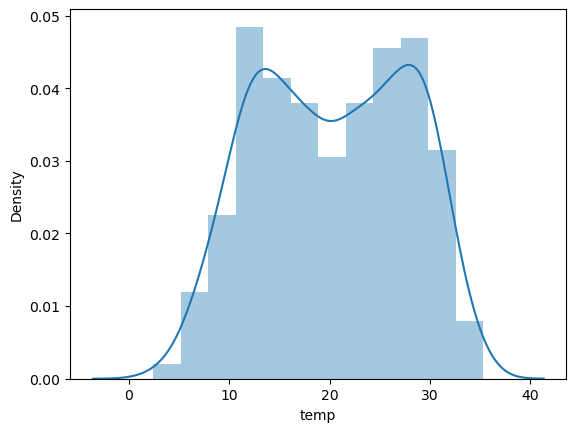

In [24]:
sns.distplot(dataset["temp"])

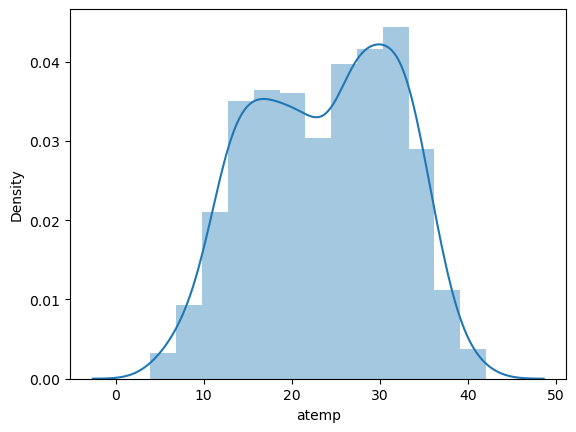

In [25]:
sns.distplot(dataset["atemp"])
plt.show()

<Axes: xlabel='windspeed', ylabel='Density'>

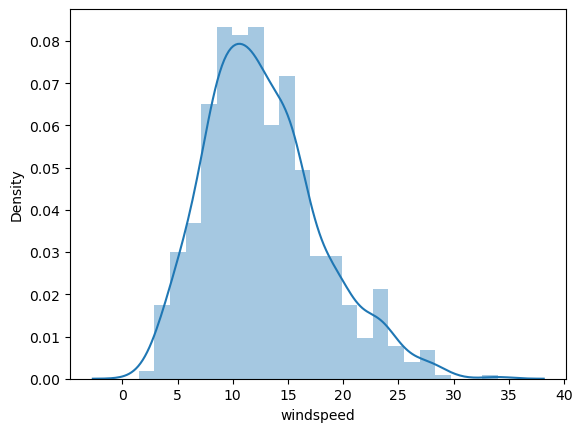

In [26]:
sns.distplot(dataset["windspeed"])

<Axes: xlabel='cnt', ylabel='Density'>

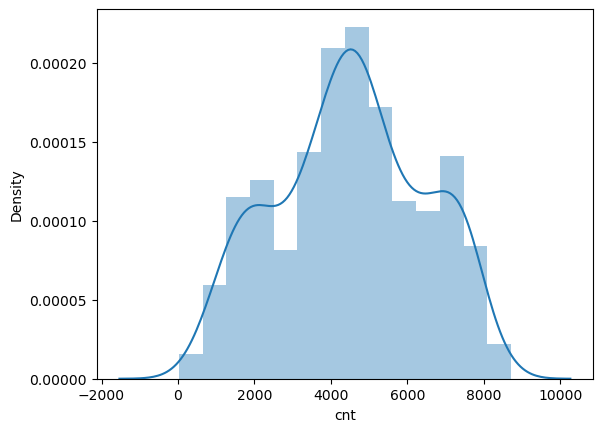

In [27]:
sns.distplot(dataset["cnt"])

In [28]:
dataset["dteday"] = pd.to_datetime(dataset["dteday"], format="%d-%m-%Y")

In [29]:
dataset_categorical=dataset.select_dtypes(exclude=["float64","datetime64","int64"])

In [30]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [31]:
dataset_categorical

,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,B
1,Spring,Jan,NaN,B
2,Spring,Jan,Mon,A
3,Spring,Jan,Tue,A
4,Spring,Jan,Wed,A
...,...,...,...,...
725,Spring,Dec,Thur,B
726,Spring,Dec,Fri,B
727,Spring,Dec,Sat,B
728,Spring,Dec,NaN,A


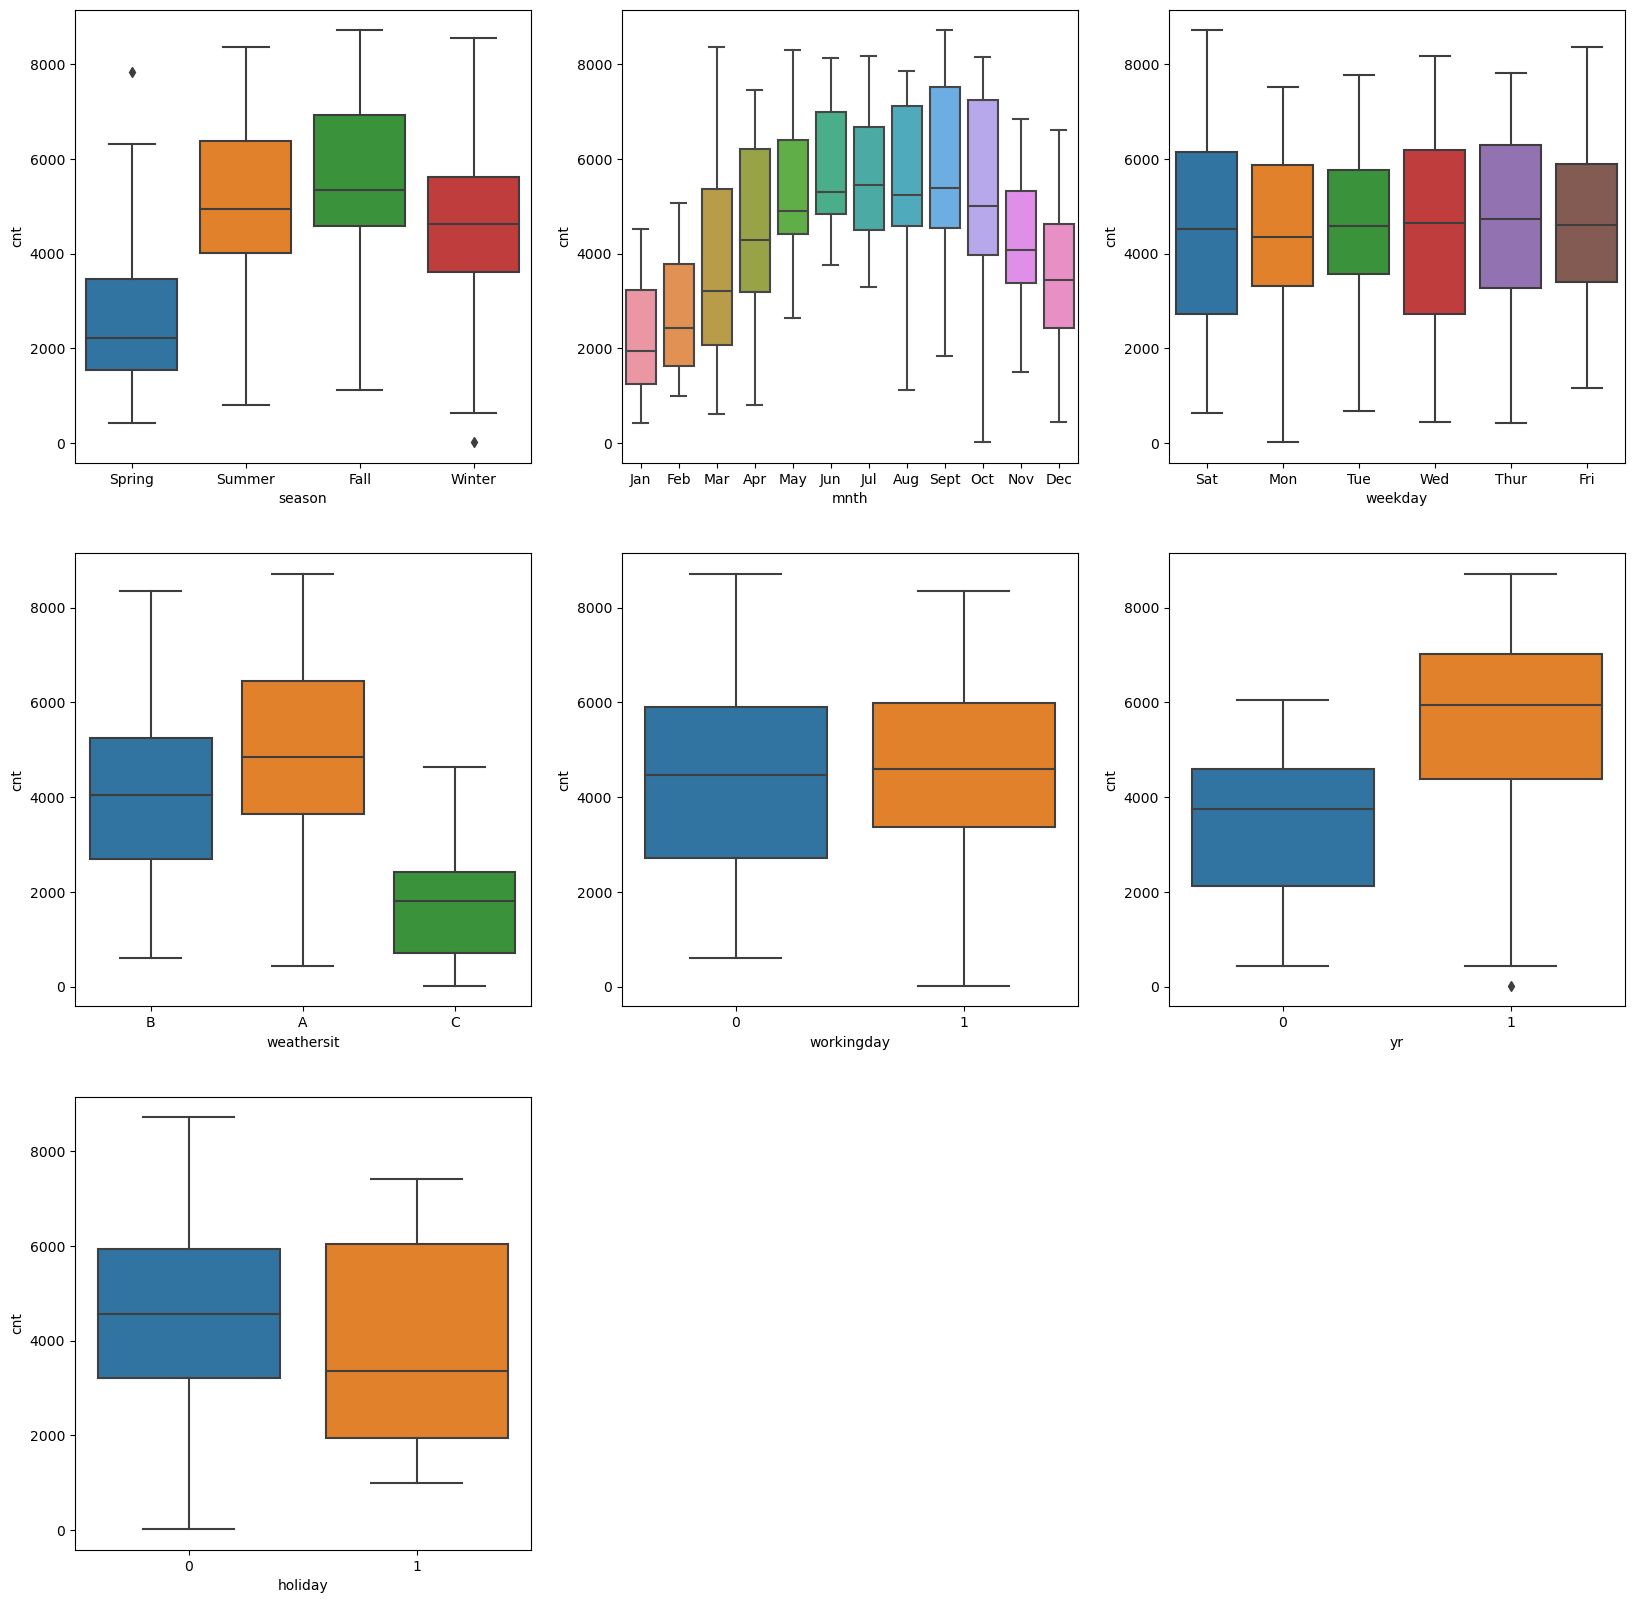

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x="season",y="cnt",data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x="mnth",y="cnt",data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x="weekday",y="cnt",data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x="weathersit",y="cnt",data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x="workingday",y="cnt",data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x="yr",y="cnt",data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x="holiday",y="cnt",data=dataset)
plt.show()

In [33]:
intvarlist = ["casual", "registered", "cnt"]
for var in intvarlist:
    dataset[var]=dataset[var].astype("float")

In [34]:
dataset_numeric=dataset.select_dtypes(include=["float64"])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [35]:
dataset_num=dataset.select_dtypes(include=['object'])
dataset_num.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,B
1,Spring,Jan,NaN,B
2,Spring,Jan,Mon,A
3,Spring,Jan,Tue,A
4,Spring,Jan,Wed,A


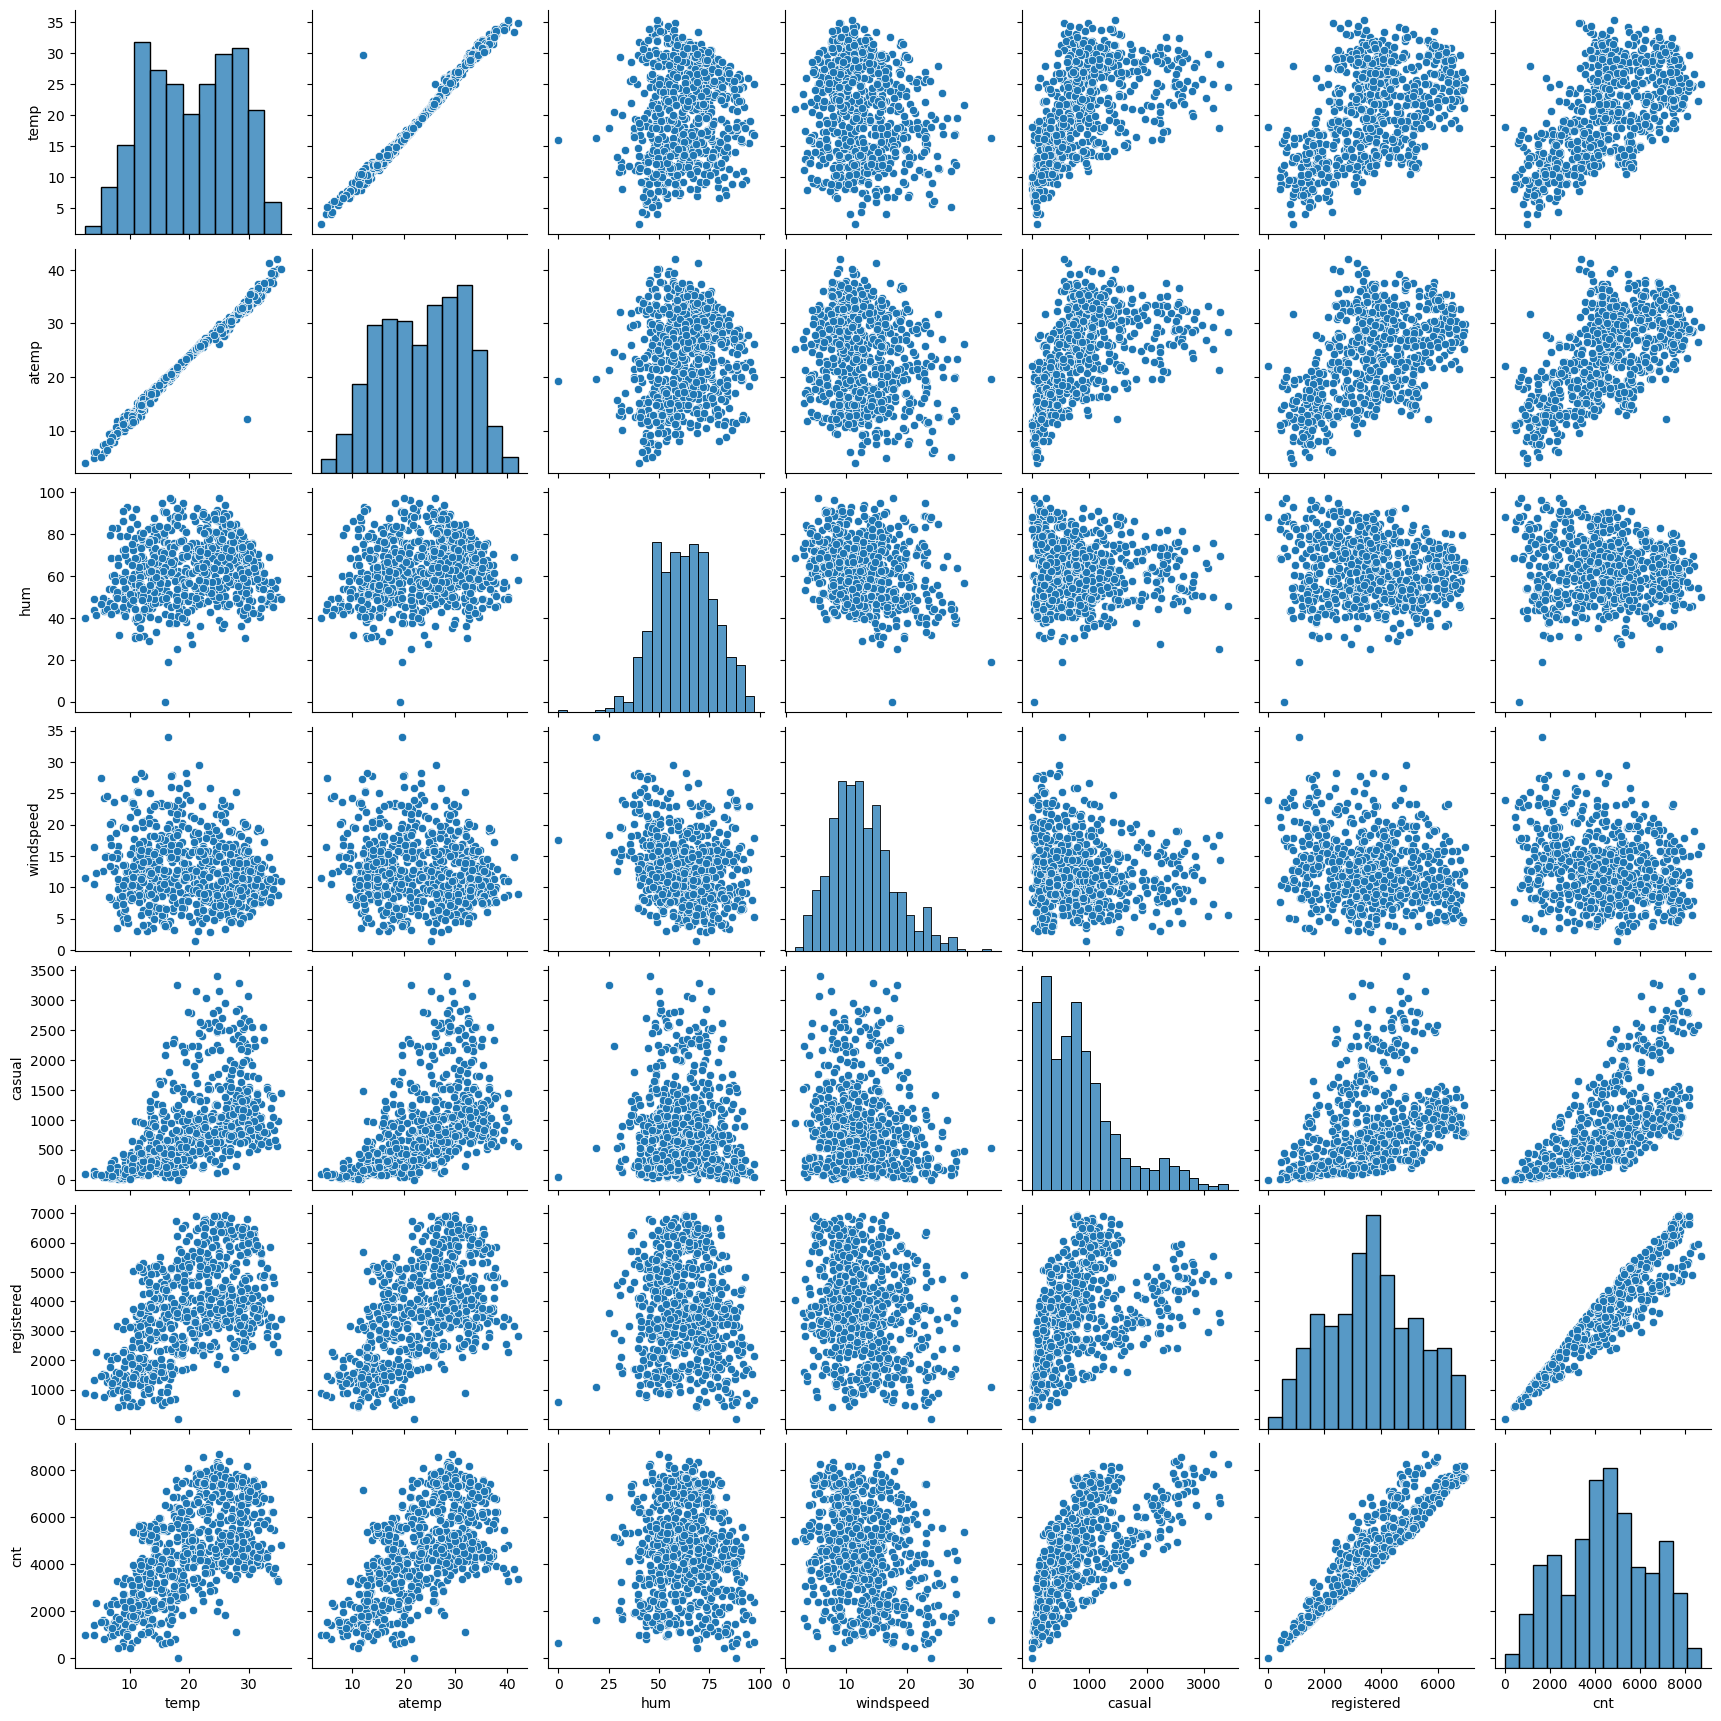

In [36]:
sns.pairplot(dataset_numeric)
plt.show()

In [37]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

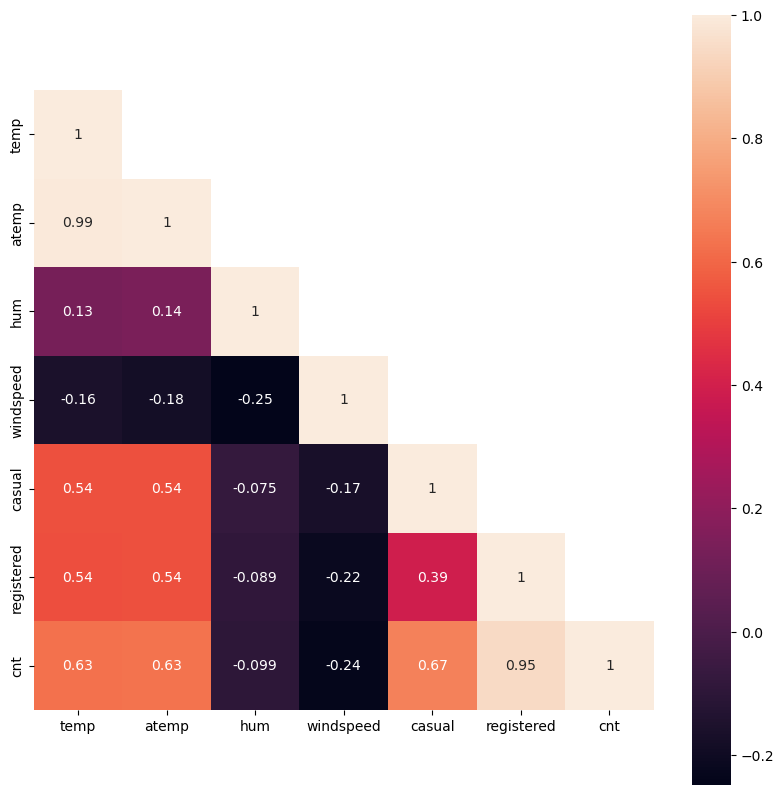

In [38]:
mask=np.array(cor)  
mask[np.tril_indices_from(mask)] = False
fig, ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)

In [39]:
dataset.drop("atemp", axis=1, inplace=True)
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,Spring,0,Jan,0,NaN,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,Spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,Spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,Spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3. Data Preparation

In [40]:
dataset_categorical=dataset.select_dtypes(include=["object"])
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,B
1,Spring,Jan,NaN,B
2,Spring,Jan,Mon,A
3,Spring,Jan,Tue,A
4,Spring,Jan,Wed,A


In [41]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True , dtype=int)
dataset_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
dataset = dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [43]:
dataset=pd.concat([dataset, dataset_dummies],axis=1)
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,0,1,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,1,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
dataset=dataset.drop(["instant","dteday"], axis=1, inplace = False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


## 4. Model Building and Evaluation 

In [45]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,1,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler =MinMaxScaler()
var=["temp","hum","windspeed","casual","registered","cnt"]
df_train[var]=scaler.fit_transform(df_train[var])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.086275,0.080392,0.150980,0.154902,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.281045,0.272166,0.358381,0.362166,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

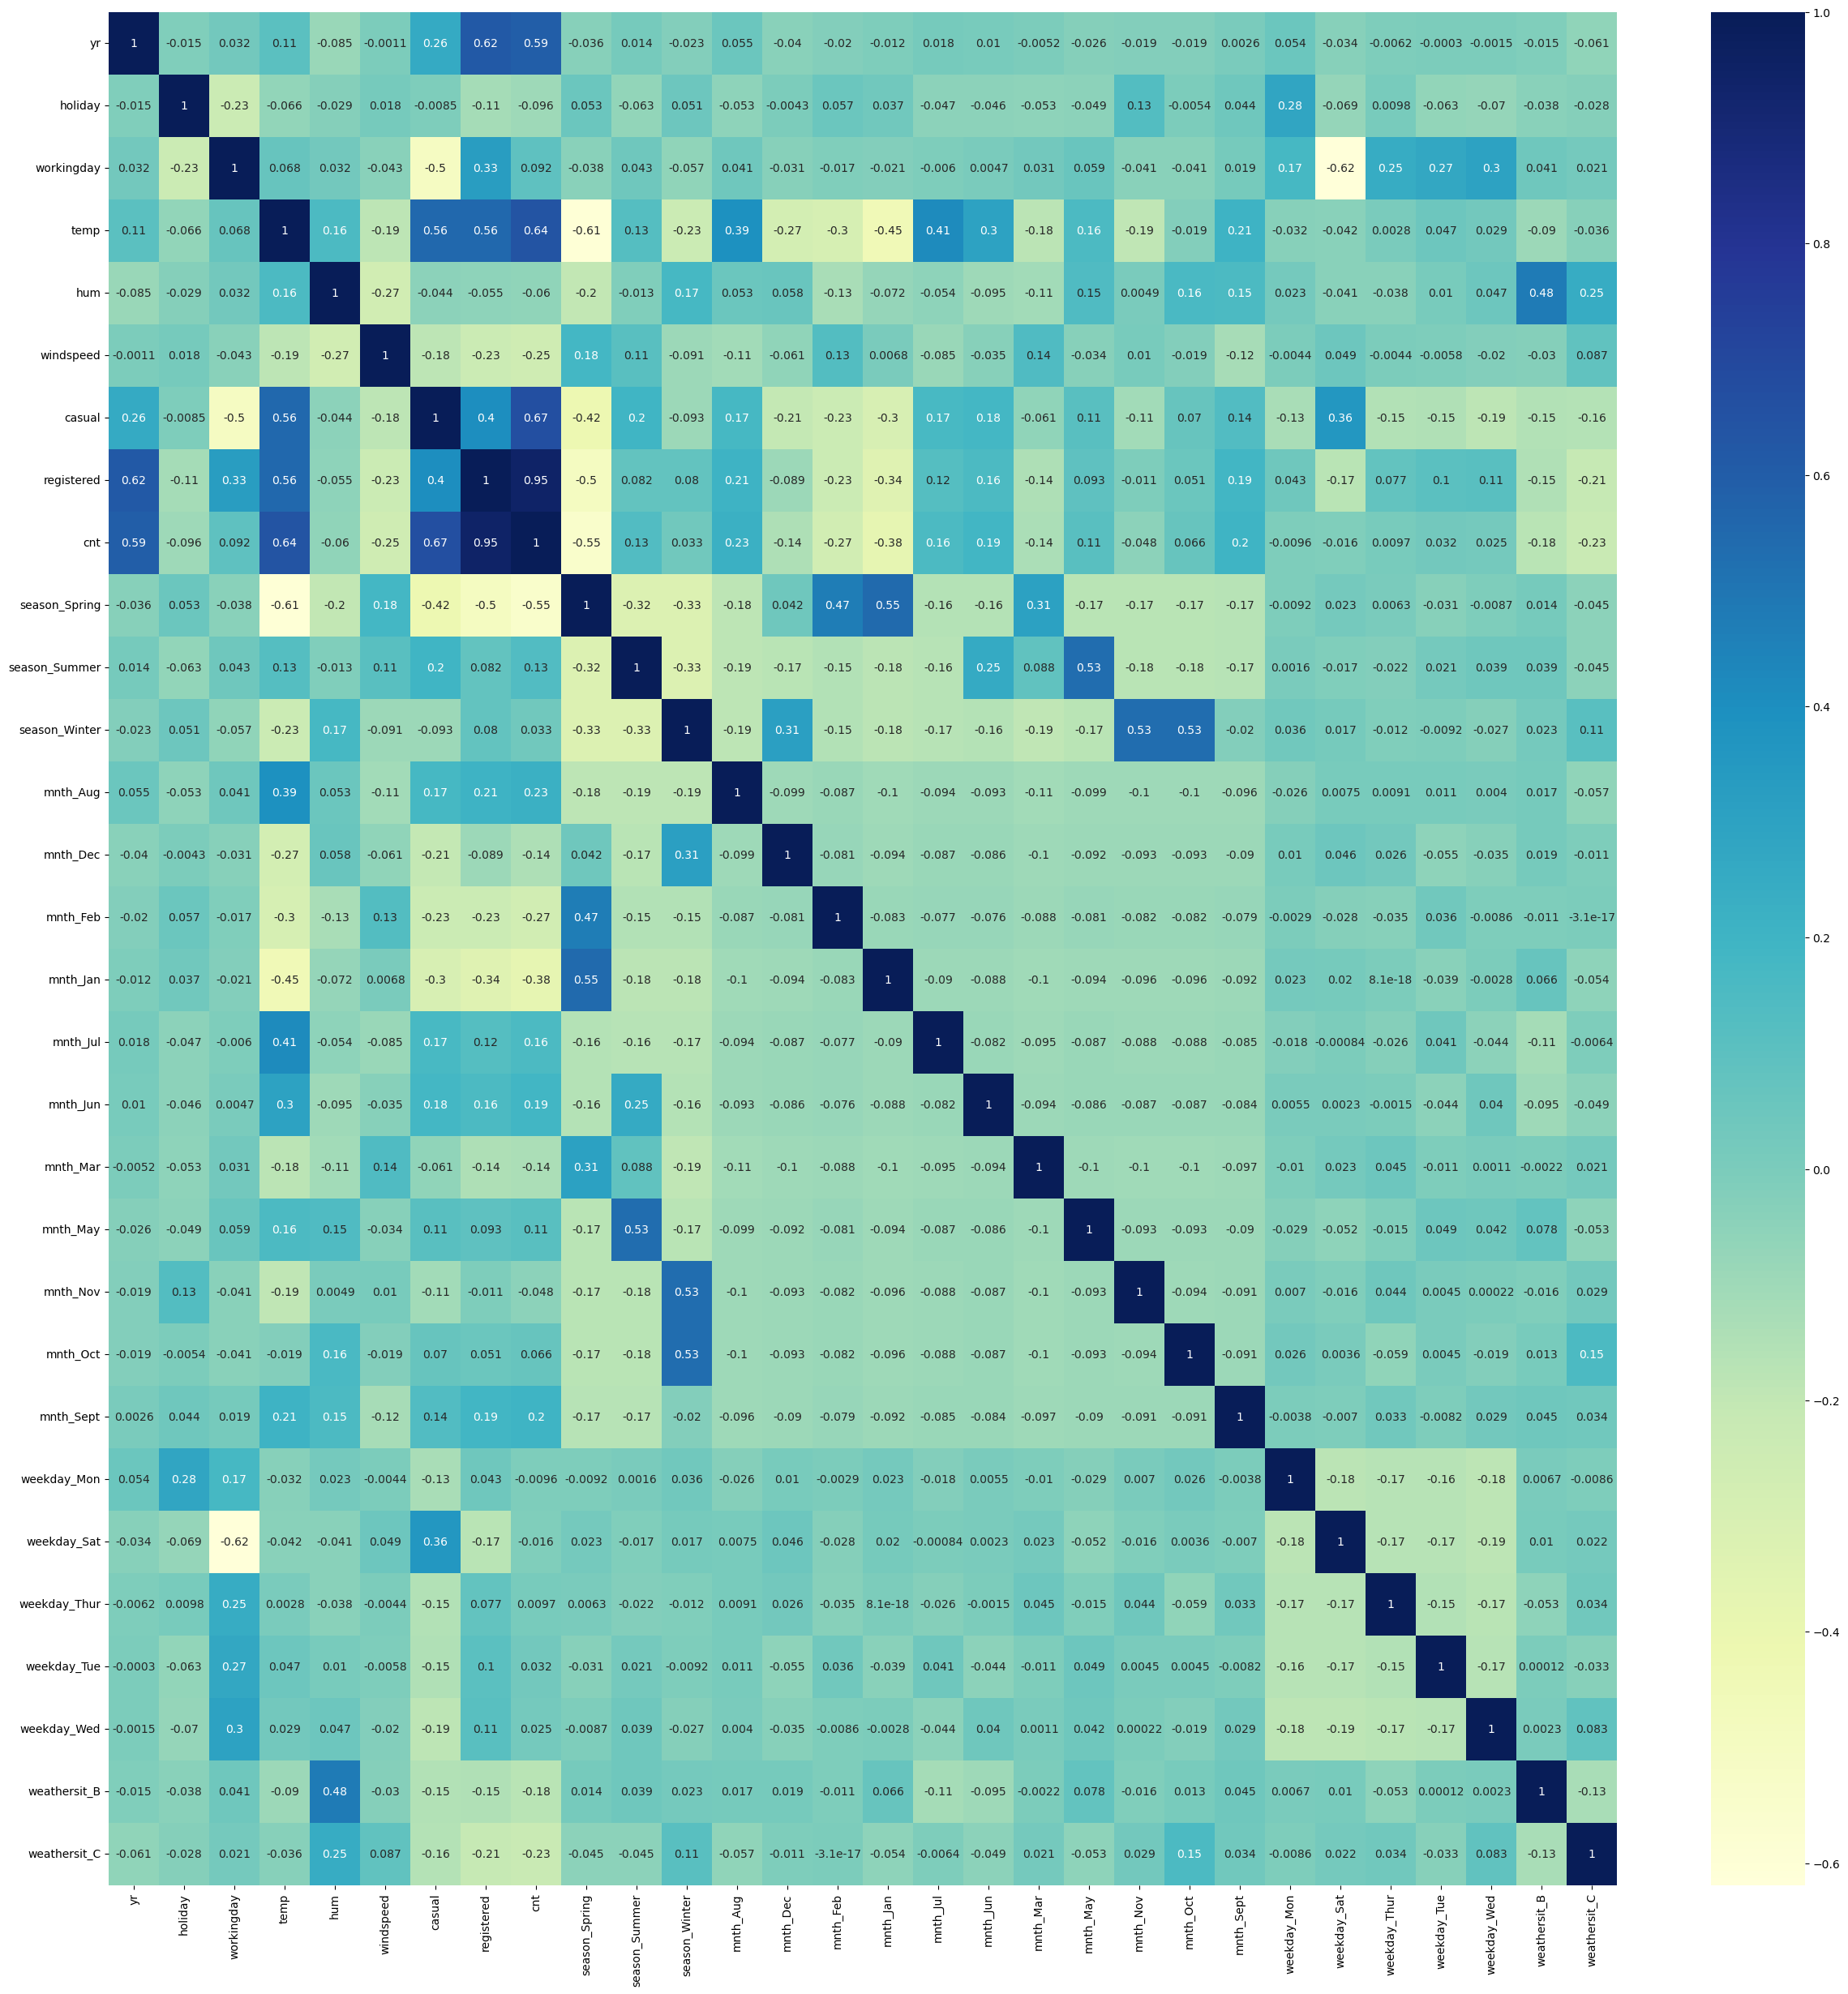

In [49]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show

In [50]:
x_train= df_train.drop(["casual","registered"], axis=1)
y_train= df_train.pop("cnt")

In [51]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
np.array(x_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [53]:
"""pip install statsmodels"""

'pip install statsmodels'

In [54]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [55]:
lr.params

const            8.326673e-17
yr              -4.458239e-16
holiday          4.232725e-16
workingday       5.655199e-16
temp             8.326673e-17
hum              4.996004e-16
windspeed        6.036838e-16
cnt              1.000000e+00
season_Spring    3.191891e-16
season_Summer    2.775558e-16
season_Winter    1.110223e-16
mnth_Aug        -1.179612e-16
mnth_Dec         5.204170e-17
mnth_Feb        -2.220446e-16
mnth_Jan        -1.075529e-16
mnth_Jul         3.469447e-17
mnth_Jun         6.938894e-17
mnth_Mar         7.632783e-17
mnth_May         2.775558e-17
mnth_Nov         1.387779e-16
mnth_Oct        -1.734723e-17
mnth_Sept       -2.775558e-17
weekday_Mon     -2.775558e-17
weekday_Sat      9.714451e-17
weekday_Thur     1.700029e-16
weekday_Tue      8.326673e-17
weekday_Wed      3.885781e-16
weathersit_B     3.295975e-17
weathersit_C     1.110223e-16
dtype: float64

In [56]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [57]:
print(lm.coef_)
print(lm.intercept_)

[ 5.90010615e-17  3.78675927e-16  1.15164240e-16  2.40984761e-16
  1.01760519e-17 -6.18887714e-17  1.00000000e+00 -2.26372190e-16
  4.19857964e-16  3.52000249e-17  1.50853805e-16 -1.47514801e-16
 -1.13231942e-16 -7.22226272e-17  4.43041622e-17 -2.57681645e-17
 -1.89028111e-16 -1.58806886e-16 -1.04303519e-16 -4.28279883e-17
  1.47750115e-16  1.45660882e-16 -3.37788106e-17 -3.50884761e-17
  3.16080054e-17  6.76118350e-17 -1.68330113e-16  1.12244161e-16]
0.0


In [58]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.290e+29
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:01:02   Log-Likelihood:                 16645.
No. Observations:                 510   AIC:                        -3.323e+04
Df Residuals:                     481   BIC:                        -3.311e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.327e-17   8.73e-16      0.095      0.924   -1.63e-15     1.8e-15
yr            -4.458e-16   2.51e-16     -1.776      0.076   -9.39e-16    4.73e-17
holiday        4.233e-16   5.71e-16      0.742      0.459   -6.98e-16    1.54e-15
workingday     5.655e-16   2.92e-16      1.937      0.053   -8.19e-18    1.14e-15
temp           8.327e-17   9.56e-16      0.087      0.931    -1.8e-15    1.96e-15
hum            4.996e-16   7.38e-16      0.677      0.499   -9.51e-16    1.95e-15
windspeed      6.037e-16   5.11e-16      1.181      0.238      -4e-16    1.61e-15
cnt               1.0000    8.6e-16   1.16e+15      0.000       1.000       1.000
season_Spring  3.192e-16   5.67e-16      0.563      0.574   -7.96e-16    1.43e-15
season_Summer  2.776e-16   4.96e-16      0.560      0.576   -6.97e-16    1.25e-15
season_Winter   1.11e-16   5.35e-16      0.208      0.836    -9.4e-16    1.16e-15
mnth_Aug       -1.18e-16   6.36e-16     -0.185      0.853   -1.37e-15    1.13e-15
mnth_Dec       5.204e-17   6.35e-16      0.082      0.935    -1.2e-15     1.3e-15
mnth_Feb       -2.22e-16   6.22e-16     -0.357      0.721   -1.44e-15    9.99e-16
mnth_Jan      -1.076e-16   6.35e-16     -0.169      0.866   -1.36e-15    1.14e-15
mnth_Jul       3.469e-17   6.63e-16      0.052      0.958   -1.27e-15    1.34e-15
mnth_Jun       6.939e-17   4.74e-16      0.147      0.884   -8.61e-16       1e-15
mnth_Mar       7.633e-17   4.63e-16      0.165      0.869   -8.34e-16    9.86e-16
mnth_May       2.776e-17   3.97e-16      0.070      0.944   -7.53e-16    8.08e-16
mnth_Nov       1.388e-16   6.87e-16      0.202      0.840   -1.21e-15    1.49e-15
mnth_Oct      -1.735e-17   6.76e-16     -0.026      0.980   -1.35e-15    1.31e-15
mnth_Sept     -2.776e-17   6.08e-16     -0.046      0.964   -1.22e-15    1.17e-15
weekday_Mon   -2.776e-17    2.9e-16     -0.096      0.924   -5.97e-16    5.41e-16
weekday_Sat    9.714e-17   2.78e-16      0.350      0.727   -4.49e-16    6.43e-16
weekday_Thur     1.7e-16   2.93e-16      0.580      0.562   -4.06e-16    7.46e-16
weekday_Tue    8.327e-17   2.93e-16      0.284      0.776   -4.93e-16    6.59e-16
weekday_Wed    3.886e-16   2.81e-16      1.382      0.168   -1.64e-16    9.41e-16
weathersit_B   3.296e-17   2.04e-16      0.162      0.872   -3.68e-16    4.34e-16
weathersit_C    1.11e-16   5.44e-16      0.204      0.838   -9.58e-16    1.18e-15
==============================================================================
Omnibus:                       11.508   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.449
Skew:                           0.146   Prob(JB):                       0.0241
Kurtosis:                       2.484   Cond. No.                         40.0
================================================================

In [59]:
from sklearn.feature_selection import RFE

In [60]:
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True False False  True  True  True  True False  True False
  True False False  True  True False  True  True False False  True False
 False False False  True]
[ 1  1  1 11 14  1  1  1  1  9  1 13  1  8  2  1  1 10  1  1  7  6  1  3
  4 12  5  1]


In [61]:
col1= x_train.columns[rfe1.support_]
col1

Index(['yr', 'holiday', 'workingday', 'windspeed', 'cnt', 'season_Spring',
       'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weathersit_C'],
      dtype='object')

In [62]:
X_train_rfe1 = x_train[col1]
x_train_lm = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.047e+32
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                        0.00
Time:                        00:01:02   Log-Likelihood:                          17481.
No. Observations:                 510   AIC:                                 -3.493e+04
Df Residuals:                     495   BIC:                                 -3.487e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr             1.006e-16   3.77e-17      2.666      0.008    2.65e-17    1.75e-16
holiday       -6.418e-16   9.54e-17     -6.730      0.000   -8.29e-16   -4.54e-16
workingday    -9.714e-17   3.93e-17     -2.471      0.014   -1.74e-16   -1.99e-17
windspeed      3.886e-16   8.09e-17      4.803      0.000     2.3e-16    5.48e-16
cnt               1.0000   8.14e-17   1.23e+16      0.000       1.000       1.000
season_Spring  -2.55e-16   4.93e-17     -5.174      0.000   -3.52e-16   -1.58e-16
season_Summer -6.939e-17    4.1e-17     -1.693      0.091    -1.5e-16    1.12e-17
mnth_Aug       -1.18e-16   5.43e-17     -2.172      0.030   -2.25e-16   -1.13e-17
mnth_Feb      -4.163e-17   6.74e-17     -0.618      0.537   -1.74e-16    9.07e-17
mnth_Jun       -1.11e-16   5.79e-17     -1.916      0.056   -2.25e-16    2.81e-18
mnth_Mar      -3.469e-18   5.38e-17     -0.064      0.949   -1.09e-16    1.02e-16
mnth_Nov       2.776e-17   5.53e-17      0.502      0.616   -8.08e-17    1.36e-16
mnth_Oct       4.163e-17    5.6e-17      0.743      0.458   -6.85e-17    1.52e-16
weekday_Sat   -1.874e-16   5.07e-17     -3.692      0.000   -2.87e-16   -8.76e-17
weathersit_C   2.429e-16   8.87e-17      2.738      0.006    6.86e-17    4.17e-16
==============================================================================
Omnibus:                       38.100   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.710
Skew:                          -0.168   Prob(JB):                     2.29e-32
Kurtosis:                       5.597   Cond. No.                         9.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,cnt,10.40
2,workingday,5.23
3,windspeed,4.31
0,yr,3.61
5,season_Spring,2.95
6,season_Summer,2.06
13,weekday_Sat,1.99
8,mnth_Feb,1.51
7,mnth_Aug,1.42
10,mnth_Mar,1.42


In [65]:
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)
rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True False False False  True  True False  True False  True False
 False False False False  True False False False False False False False
 False False False False]
[ 1  1  7 19 22  1  1  2  1 17  1 21  6 16 10  3  1 18  8  5 15 14  4 11
 12 20 13  9]


In [66]:
col2 = x_train.columns[rfe2.support_]
x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.281e+31
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:01:03   Log-Likelihood:                 17361.
No. Observations:                 510   AIC:                        -3.471e+04
Df Residuals:                     502   BIC:                        -3.467e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.249e-16   6.68e-17     -1.870      0.062   -2.56e-16    6.31e-18
yr            -2.394e-16   4.57e-17     -5.236      0.000   -3.29e-16    -1.5e-16
holiday       -1.119e-16   1.14e-16     -0.983      0.326   -3.36e-16    1.12e-16
windspeed     -3.816e-16   1.12e-16     -3.401      0.001   -6.02e-16   -1.61e-16
cnt               1.0000   1.11e-16   9.02e+15      0.000       1.000       1.000
season_Summer  1.665e-16   4.38e-17      3.800      0.000    8.04e-17    2.53e-16
mnth_Aug      -2.984e-16   6.41e-17     -4.655      0.000   -4.24e-16   -1.72e-16
mnth_Mar       2.429e-16   6.14e-17      3.957      0.000    1.22e-16    3.63e-16
==============================================================================
Omnibus:                        5.337   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.331
Skew:                           0.250   Prob(JB):                       0.0696
Kurtosis:                       2.990   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif1 = pd.DataFrame()
vif1['features'] = x_train_rfe2.columns
vif1['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif1['VIF'] =round(vif1['VIF'],2)
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

,features,VIF
0,const,14.14
4,cnt,1.96
1,yr,1.66
3,windspeed,1.15
5,season_Summer,1.13
6,mnth_Aug,1.13
7,mnth_Mar,1.06
2,holiday,1.02


<Axes: ylabel='Density'>

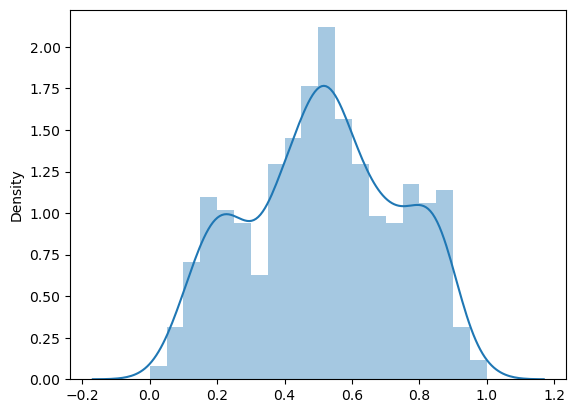

In [68]:
y_train_cnt = lm2.predict(x_train_rfe2)
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

In [69]:
df_test[var]= scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,1,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,1,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,1,...,0,0,0,0,0,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,0,...,0,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,0,1,0,0,0,0,0,1,1,0


In [71]:
x_test = df_test.pop("casual")
registered = df_test.pop("registered")

In [72]:
c =x_train_rfe2.drop('const', axis=1)

In [73]:
col2 = c.columns

In [76]:
x_test_rfe2 = x_test[col2]

KeyError: "None of [Index(['yr', 'holiday', 'workingday', 'windspeed', 'cnt', 'season_Spring',\n       'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',\n       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weathersit_C'],\n      dtype='object')] are in the [index]"

In [ ]:
x_test_rfe2 = x_test.reindex(columns = col2)

In [ ]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [ ]:
x_test_rfe2.info()

In [ ]:
y_predict = lm2.predict(x_test_rfe2)

In [ ]:
plt.figure()
plt.scattter(y_test,y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(),cmap="YlGnBu", annot = True)